# Khushhal_IBM_Data_Science_Project

# Flight Price Prediction

### Problem Statement

I have build an ML model that predicts flight ticket prices based on various independent features, using a dataset of flight ticket prices from the Kaggle website. The dataset includes prices for various airlines and cities between March and June of 2019, with a training set of 10,683 records and a test set of 2,671 records. The prediction results can be beneficial for both travelers, who can use it to make informed decisions about their travel, and for airlines, who can use it to forecast competitors' rates and adjust their pricing strategies to maximize revenue while remaining competitive.

- Size of training set: 10683 records
- Size of test set: 2671 records
- Link of the dataset:- https://www.kaggle.com/datasets/nikhilmittal/flight-fare-prediction-mh

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Loading the Flight Fare Data

In [2]:
Train_data=pd.read_csv("Data_Train.csv")
Train_data.shape

(10683, 11)

In [3]:
Test_data=pd.read_csv("Test_set.csv")
Test_data.shape

(2671, 10)

In [4]:
flight_df=pd.concat([Train_data,Test_data])
flight_df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU ? BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270.0
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087.0
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL ? BOM ? COK,11:25,19:15,7h 50m,1 stop,No info,8625.0


### Data Inspection

#### Shape of the dataset

In [5]:
flight_df.shape

(13354, 11)

#### Summary of the dataset


In [6]:
flight_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Since this dataset has only 1 numercial column, describe() will display summary statistics only for the "Price" column.

In [7]:
#information about the data, checking datatypes

flight_df.info()       

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [8]:
flight_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

### Exploratory Data Analysis (EDA)

#### Bar chart showing top 10 most preferred Airlines

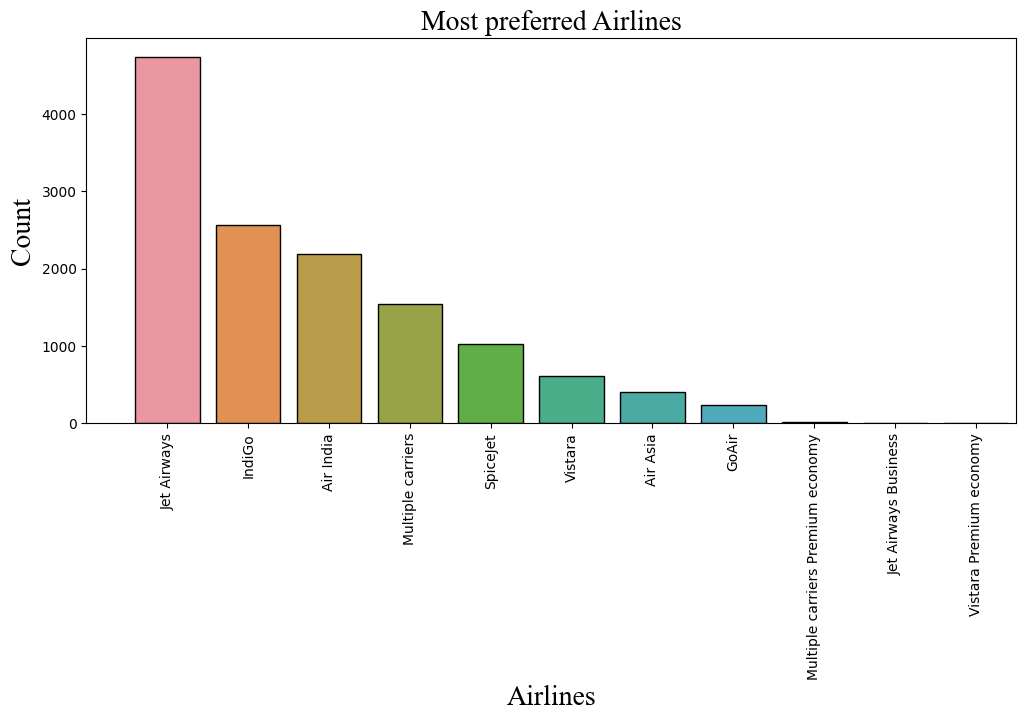

In [9]:
plt.figure(figsize=(12,5))
sns.countplot(x="Airline", data=flight_df,order = flight_df['Airline'].value_counts().index,ec = "black")
font_style={'family':'times new roman','size':20,'color':'black'}
plt.title("Most preferred Airlines",fontdict=font_style)
plt.ylabel("Count",fontdict=font_style)
plt.xlabel("Airlines",fontdict=font_style)
plt.xticks(rotation= 90)
plt.xlim(-1,10.5)
plt.show()

##### Insights
- Most preferred Airline is "Jet Airways"
- From all the total flight tickets sold, Jet Airways has the highest share followed by Indigo.

#### Airlines Vs Flight ticket Price

In [10]:
airlines = flight_df.groupby('Airline').Price.max()
airlines_df= airlines.to_frame().sort_values('Price',ascending=False)[0:10]
airlines_df

,Price
Airline,
Jet Airways Business,79512.0
Jet Airways,54826.0
Multiple carriers,36983.0
Air India,31945.0
SpiceJet,23267.0
GoAir,22794.0
IndiGo,22153.0
Vistara,21730.0
Multiple carriers Premium economy,14629.0


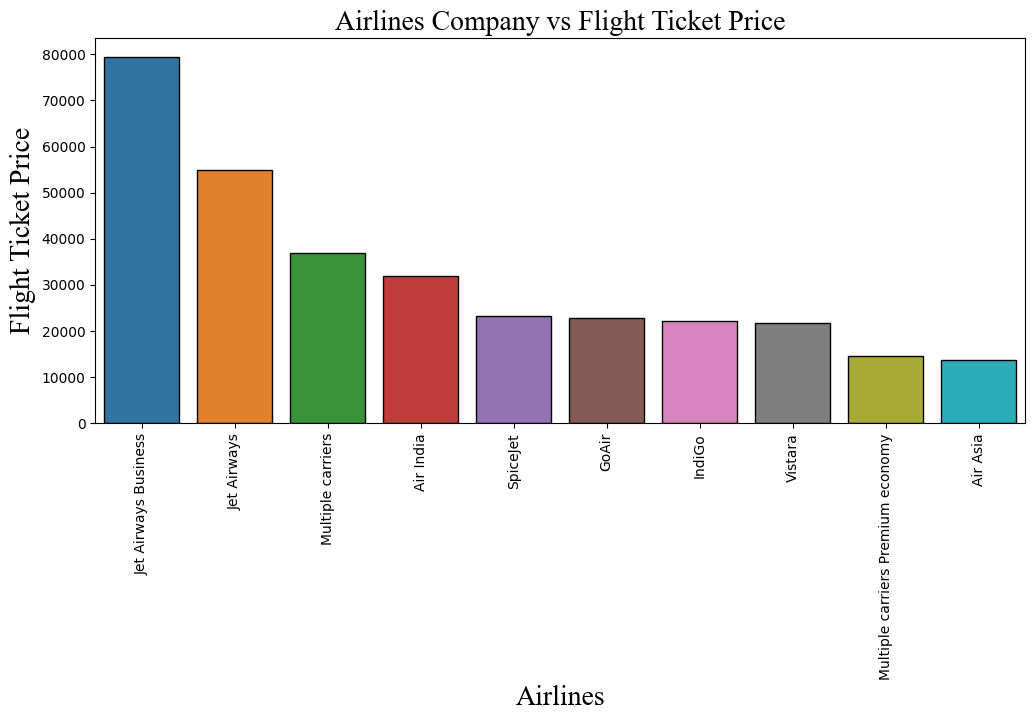

In [11]:
plt.subplots(figsize=(12,5))
sns.barplot(x=airlines_df.index, y=airlines_df["Price"],ec = "black")
font_style={'family':'times new roman','size':20,'color':'black'}
plt.title("Airlines Company vs Flight Ticket Price",fontdict=font_style )
plt.ylabel("Flight Ticket Price", fontdict=font_style)
plt.xlabel("Airlines", fontdict=font_style)
plt.xticks(rotation=90)
plt.show()

##### Insights
- "Jet Airways Business" tickets are the most expensive ones.

#### Price on Weekdays vs Weekends

In [12]:
days_df = flight_df[['Airline','Date_of_Journey', 'Price']].copy()
days_df.head()

,Airline,Date_of_Journey,Price
0,IndiGo,24/03/2019,3897.0
1,Air India,1/05/2019,7662.0
2,Jet Airways,9/06/2019,13882.0
3,IndiGo,12/05/2019,6218.0
4,IndiGo,01/03/2019,13302.0


In [13]:
days_df['Date_of_Journey'] = pd.to_datetime(days_df['Date_of_Journey'],format='%d/%m/%Y')
days_df['Weekday'] = days_df['Date_of_Journey'].dt.day_name()
days_df['Weekend'] = days_df['Weekday'].apply(lambda day: 1 if day == 'Sunday' else 0)
days_df.head()

,Airline,Date_of_Journey,Price,Weekday,Weekend
0,IndiGo,2019-03-24,3897.0,Sunday,1
1,Air India,2019-05-01,7662.0,Wednesday,0
2,Jet Airways,2019-06-09,13882.0,Sunday,1
3,IndiGo,2019-05-12,6218.0,Sunday,1
4,IndiGo,2019-03-01,13302.0,Friday,0


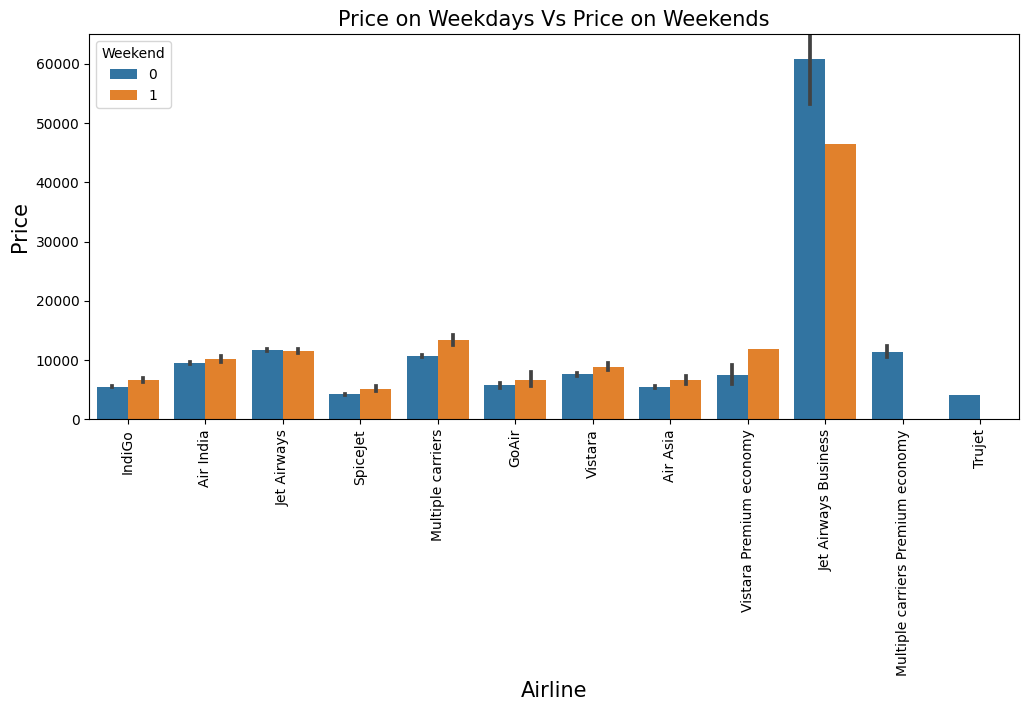

In [14]:
plt.subplots(figsize=(12,5))
sns.barplot(data=days_df,x='Airline',y='Price',hue='Weekend')
plt.xlabel("Airline",size = 15)
plt.xticks(rotation = 90)
plt.ylabel("Price",size = 15)
plt.title("Price on Weekdays Vs Price on Weekends",size = 15)
plt.legend(title='Weekend'.title())
plt.ylim(0,65000)
plt.show()

##### Insights
- The Price of tickets is higher on Weekends.

### Feature Engineering

In [15]:
# Extact day, month, year from Date_of_Journey feature and store them in new columns. 

flight_df["Journey_date"]=flight_df["Date_of_Journey"].str.split("/").str[0].astype(int)
flight_df["Journey_month"]=flight_df["Date_of_Journey"].str.split("/").str[1].astype(int)
flight_df["Journey_year"]=flight_df["Date_of_Journey"].str.split("/").str[2].astype(int)

In [16]:
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [17]:
# Now Date_of_Journey column is no longer required, so we can drop it.

flight_df=flight_df.drop(["Date_of_Journey"],axis=1)

In [18]:
flight_df["Journey_year"].value_counts()

Journey_year
2019    13354
Name: count, dtype: int64

In [19]:
# Since Journey_year is the same ("2019") for all rows, we can drop it.

flight_df=flight_df.drop(["Journey_year"],axis=1)
flight_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3


In [20]:
# Total_Stops 

flight_df["Total_Stops"]=flight_df["Total_Stops"].str.split(" ").str[0]
flight_df["Total_Stops"]=flight_df["Total_Stops"].replace("non-stop","0")
flight_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897.0,24,3
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2,No info,7662.0,1,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2,No info,13882.0,9,6
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1,No info,6218.0,12,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1,No info,13302.0,1,3


In [21]:
# Extracting hours and min from Arrival time, Departure time

# Arrival_Time
flight_df["Arrival_Time"]=flight_df["Arrival_Time"].str.split(" ").str[0]
flight_df['Arrival_hour']=flight_df["Arrival_Time"].str.split(':').str[0].astype(int)
flight_df['Arrival_min']=flight_df["Arrival_Time"].str.split(':').str[1].astype(int)
flight_df=flight_df.drop(["Arrival_Time"],axis=1)

# Dep_Time
flight_df['Dep_hour']=flight_df["Dep_Time"].str.split(':').str[0].astype(int)
flight_df['Dep_min']=flight_df["Dep_Time"].str.split(':').str[1].astype(int)
flight_df=flight_df.drop(["Dep_Time"],axis=1)

flight_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,0,No info,3897.0,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2,No info,7662.0,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2,No info,13882.0,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1,No info,6218.0,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1,No info,13302.0,1,3,21,35,16,50


#### Route column

- The route column tells about the journey's path.
- Route column can be removed because 'Total_Stops' field has already captured this value and both are related.

'Additional_Info' column can be dropped since more than 70% of them have no information.

In [22]:
flight_df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

#### Duration column
- Extract hours and min from Duration feature.
- Convert hours to min and find total duration in minutes to make it a single column.

In [23]:
flight_df["Duration_hr"]=flight_df["Duration"].str.split(' ').str[0].str.split('h').str[0]

In [24]:
flight_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897.0,24,3,1,10,22,20,2
1,Air India,Kolkata,Banglore,7h 25m,2,7662.0,1,5,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,19h,2,13882.0,9,6,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218.0,12,5,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302.0,1,3,21,35,16,50,4


In [25]:
flight_df["Duration_min"]=flight_df["Duration"].str.split(' ').str[1].str.split('m').str[0]

In [26]:
flight_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897.0,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,7662.0,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2,13882.0,9,6,4,25,9,25,19,NaN
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218.0,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302.0,1,3,21,35,16,50,4,45


In [27]:
flight_df['Duration_min'].fillna("0",inplace=True)

In [28]:
flight_df['Duration_hr'].str.contains('h').sum()

0

In [29]:
flight_df['Duration_hr'].str.contains('m').sum()

2

In [30]:
flight_df['Duration_min'].str.contains('h').sum()

0

In [31]:
flight_df['Duration_min'].str.contains('m').sum()

0

In [32]:
flight_df[flight_df['Duration_hr'].str.contains('m')]

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min
6474,Air India,Mumbai,Hyderabad,5m,2,17327.0,6,3,16,55,16,50,5m,0
2660,Air India,Mumbai,Hyderabad,5m,2,NaN,12,3,16,55,16,50,5m,0


In [33]:
flight_df.loc[[6474, 2660], 'Duration_min'] = flight_df.loc[[6474, 2660], 'Duration_hr']
flight_df.loc[flight_df['Duration_min'] == '5m', 'Duration_min'] = 5

In [34]:
flight_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897.0,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,7662.0,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2,13882.0,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218.0,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302.0,1,3,21,35,16,50,4,45


In [35]:
flight_df["Duration_hr"]=flight_df["Duration_hr"].replace("5m","0")

In [36]:
flight_df['Duration_hr'].str.contains('m').sum()

0

In [37]:
flight_df[flight_df['Duration_hr'].str.contains('m')]

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min


In [38]:
flight_df["Duration_hr"] = flight_df["Duration_hr"].astype(int)

In [39]:
flight_df["Duration_min"] = flight_df["Duration_min"].astype(int)

In [40]:
flight_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897.0,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,7662.0,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2,13882.0,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218.0,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302.0,1,3,21,35,16,50,4,45


In [41]:
flight_df["Duration"] = (flight_df["Duration_hr"]*60) + flight_df["Duration_min"]
flight_df=flight_df.drop(['Duration_hr','Duration_min'],axis=1)
flight_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,170,0,3897.0,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,445,2,7662.0,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,1140,2,13882.0,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,325,1,6218.0,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,285,1,13302.0,1,3,21,35,16,50


In [42]:
flight_df.head(6475)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,170,0,3897.0,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,445,2,7662.0,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,1140,2,13882.0,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,325,1,6218.0,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,285,1,13302.0,1,3,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...
6470,Multiple carriers Premium economy,Delhi,Cochin,725,1,9845.0,21,3,21,0,8,55
6471,IndiGo,Banglore,Delhi,165,0,4077.0,1,5,4,15,1,30
6472,Multiple carriers,Delhi,Cochin,690,1,9315.0,21,5,19,0,7,30
6473,Jet Airways,Kolkata,Banglore,570,1,14781.0,9,5,23,35,14,5


### Checking for null values

In [43]:
flight_df.isnull().sum()

Airline             0
Source              0
Destination         0
Duration            0
Total_Stops         1
Price            2671
Journey_date        0
Journey_month       0
Arrival_hour        0
Arrival_min         0
Dep_hour            0
Dep_min             0
dtype: int64

In [44]:
# Price column has null values. Fill it with mean value
flight_df["Price"].fillna(flight_df["Price"].mean(),inplace=True)

In [45]:
# filling Total_Stops
flight_df["Total_Stops"].value_counts()

Total_Stops
1    7056
0    4340
2    1899
3      56
4       2
Name: count, dtype: int64

In [78]:
flight_df["Price"].value_counts()

Price
9087.064121     2671
10262.000000     258
10844.000000     212
7229.000000      162
4804.000000      160
                ... 
14153.000000       1
8488.000000        1
7826.000000        1
6315.000000        1
15586.000000       1
Name: count, Length: 1871, dtype: int64

In [46]:
flight_df.dtypes

Airline           object
Source            object
Destination       object
Duration           int32
Total_Stops       object
Price            float64
Journey_date       int32
Journey_month      int32
Arrival_hour       int32
Arrival_min        int32
Dep_hour           int32
Dep_min            int32
dtype: object

In [47]:
# '1' is most frequently occuring value. So fill Total_Stops column null values by '1'
flight_df["Total_Stops"]=flight_df["Total_Stops"].fillna('1')

In [48]:
flight_df["Total_Stops"]=flight_df["Total_Stops"].astype(int)

In [49]:
flight_df.isnull().sum()

Airline          0
Source           0
Destination      0
Duration         0
Total_Stops      0
Price            0
Journey_date     0
Journey_month    0
Arrival_hour     0
Arrival_min      0
Dep_hour         0
Dep_min          0
dtype: int64

### Using Encoding to Handle categorical data
##### Features with Categorical data
- Airline
- Source
- Destination

Apply Label Encoder to these features.    

In [50]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
for i in ["Airline","Source","Destination"]:
    flight_df[i]=la.fit_transform(flight_df[i])
flight_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,3,0,5,170,0,3897.0,24,3,1,10,22,20
1,1,3,0,445,2,7662.0,1,5,13,15,5,50
2,4,2,1,1140,2,13882.0,9,6,4,25,9,25
3,3,3,0,325,1,6218.0,12,5,23,30,18,5
4,3,0,5,285,1,13302.0,1,3,21,35,16,50


### Feature Selection

- Finding out the best feature which will contribute and have good relation with the target variable(Price).
- Let's use heat map to find correlation between features.

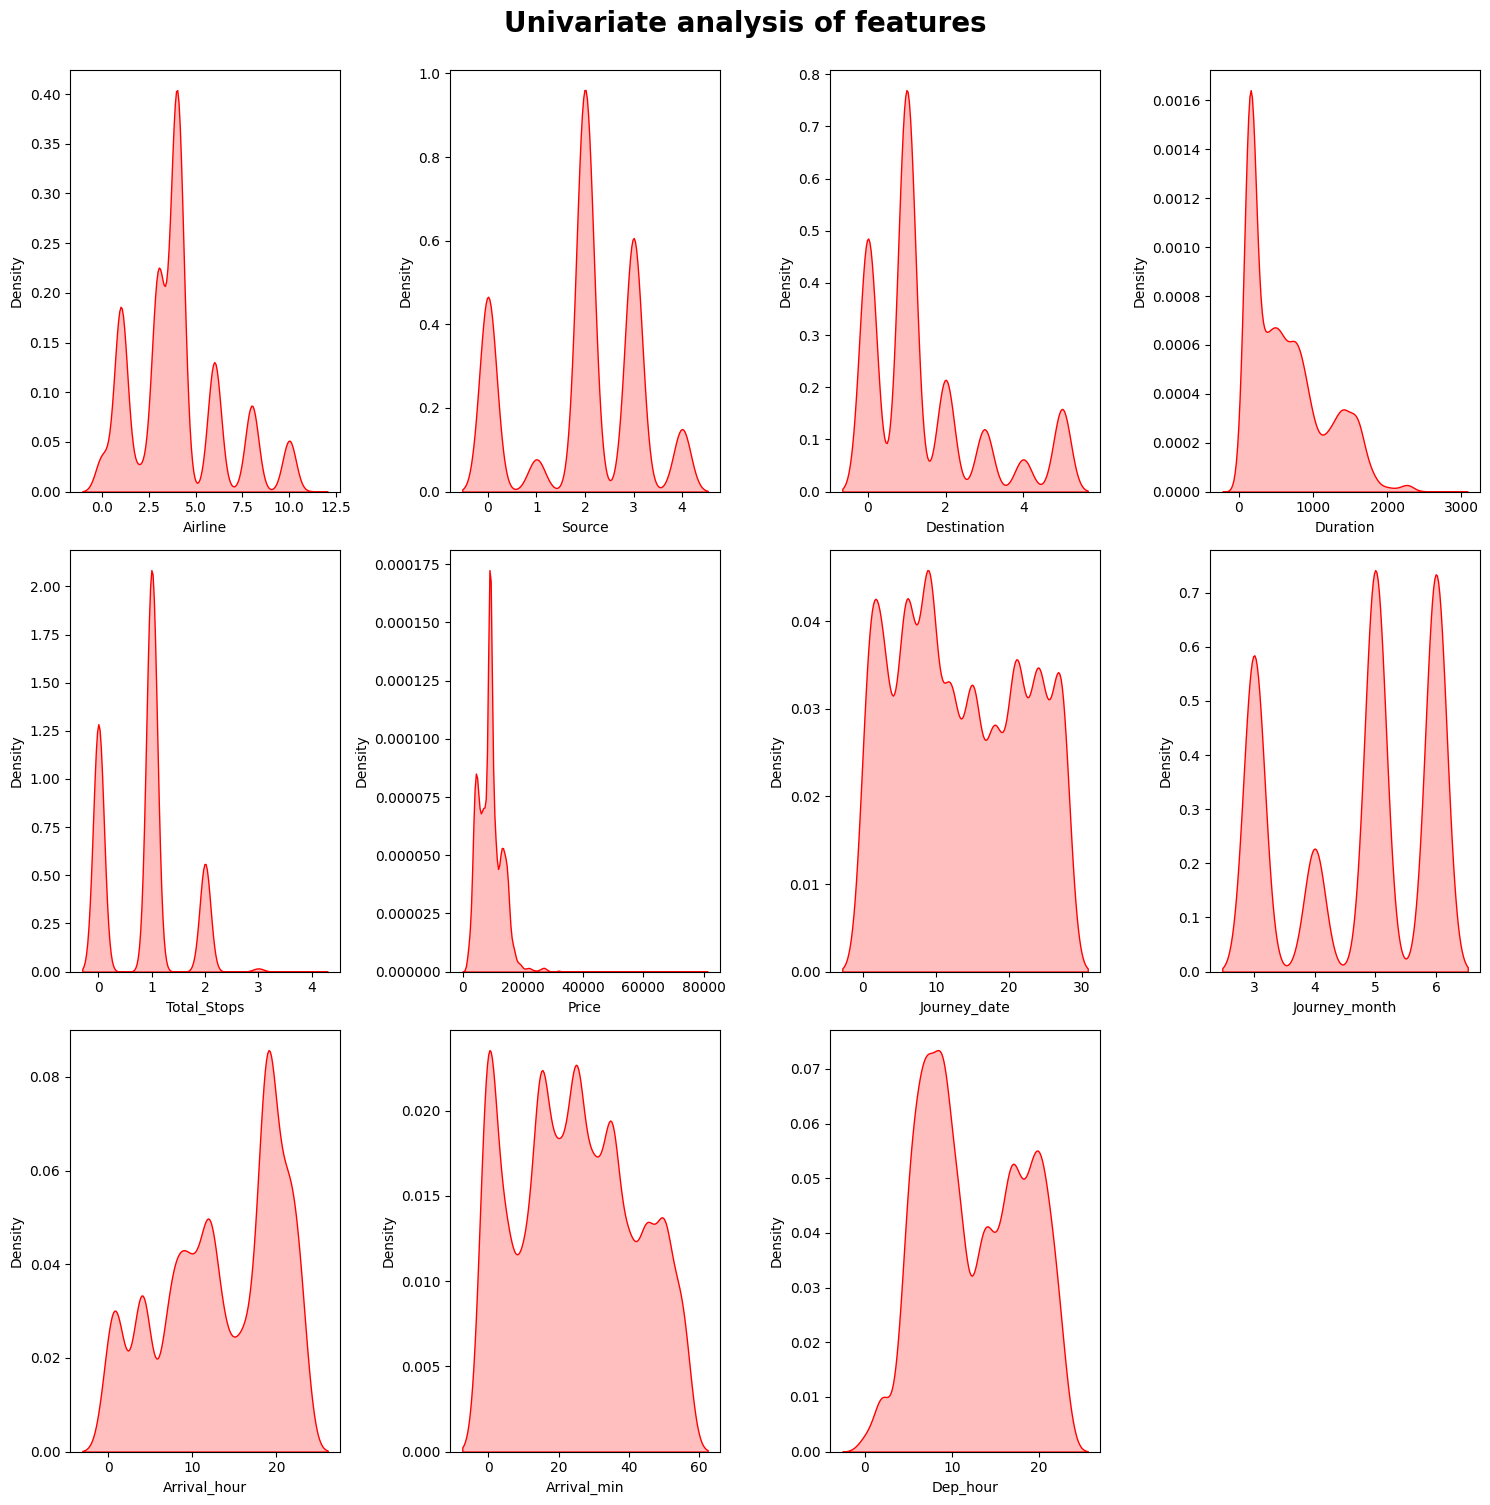

In [71]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate analysis of features",fontsize=20,fontweight='bold',y=1)

for i in range(0,len(flight_df.columns)-1):
    plt.subplot(3,4,i+1)
    sns.kdeplot(x=flight_df[flight_df.columns[i]],shade=True,color='red')
    plt.xlabel(flight_df.columns[i])
    plt.tight_layout()

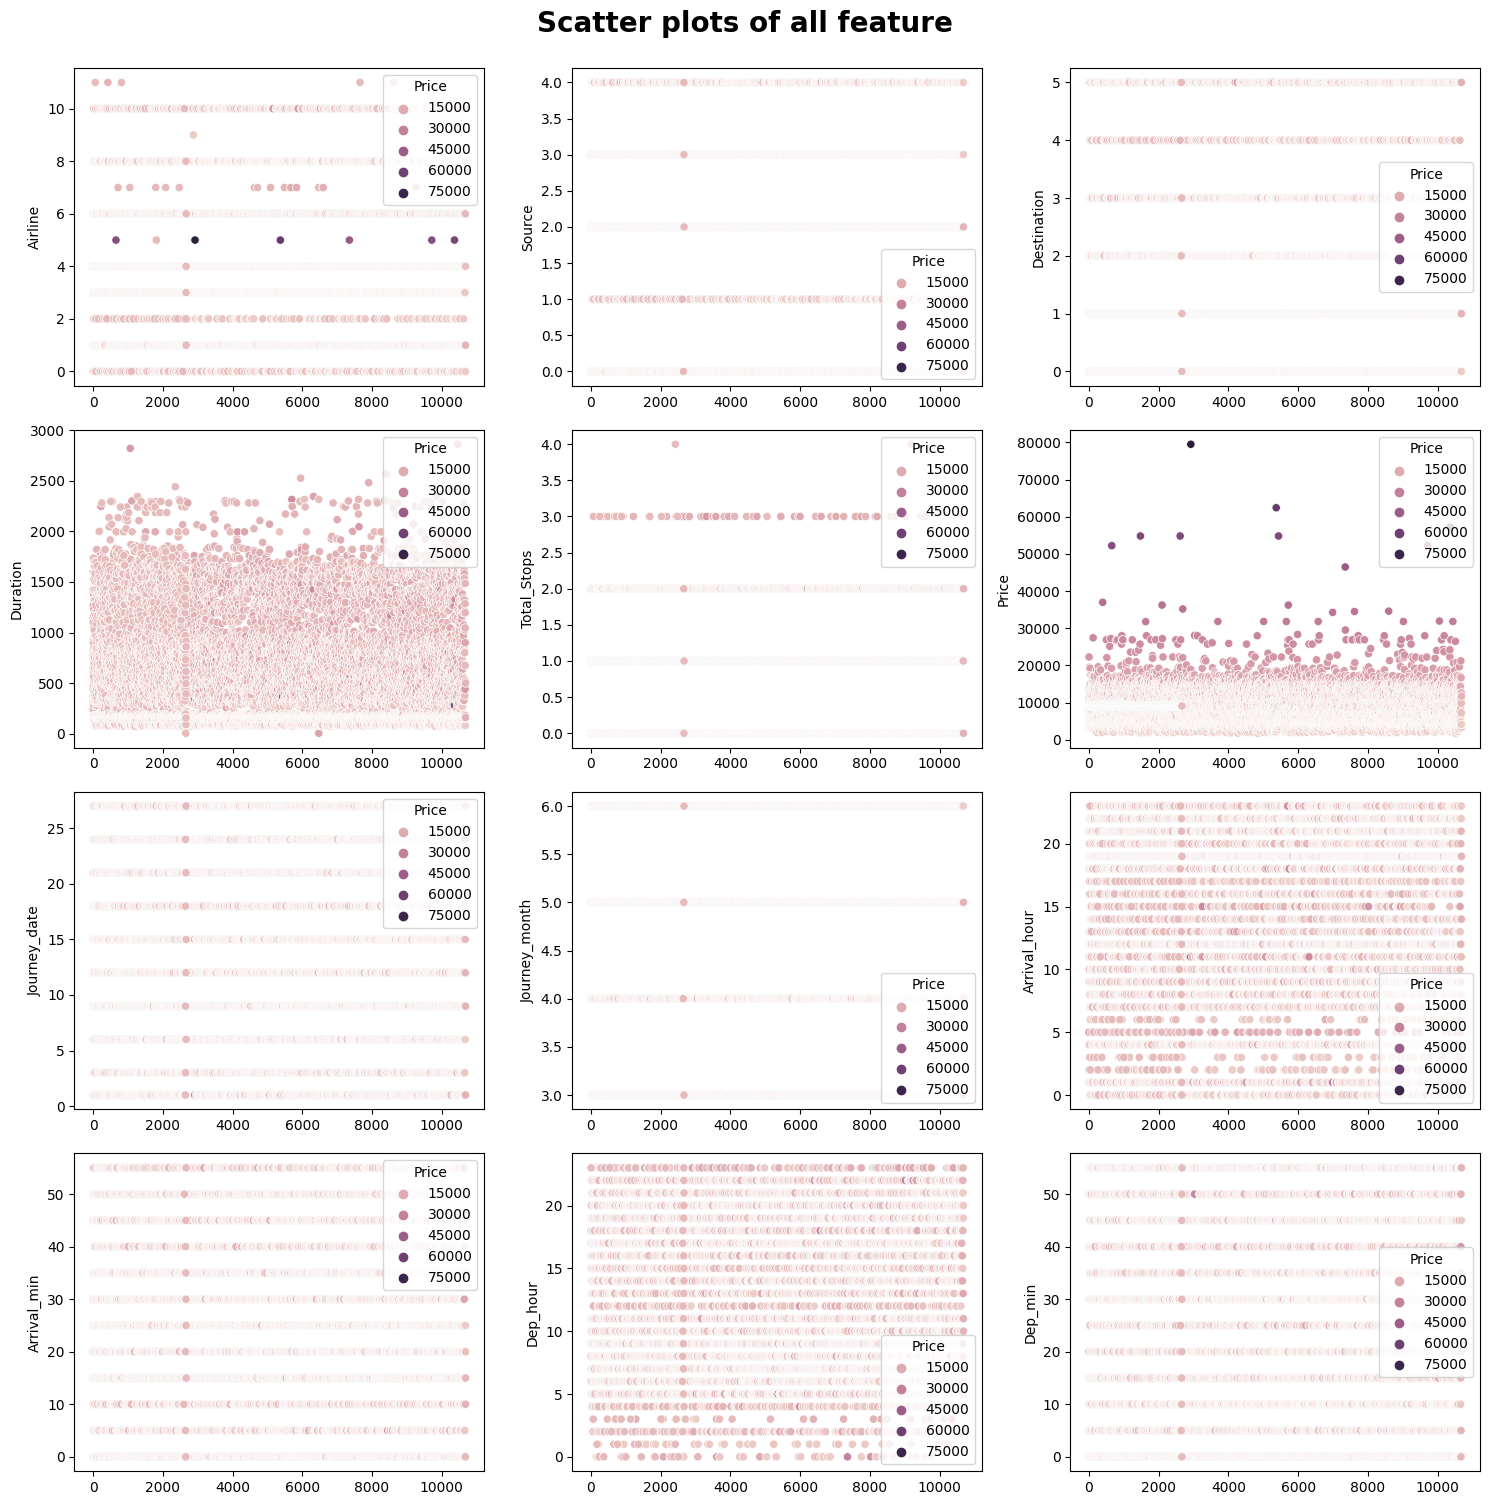

In [92]:
plt.figure(figsize=(15,15))
plt.suptitle("Scatter plots of all feature",fontsize=20,fontweight='bold',y=1)

for i in range(0,len(flight_df.columns)-1):
    plt.subplot(4,3,i+1)
    sns.scatterplot(y=flight_df.columns[i],x=flight_df.index,data=flight_df,hue='Price')
    plt.tight_layout()

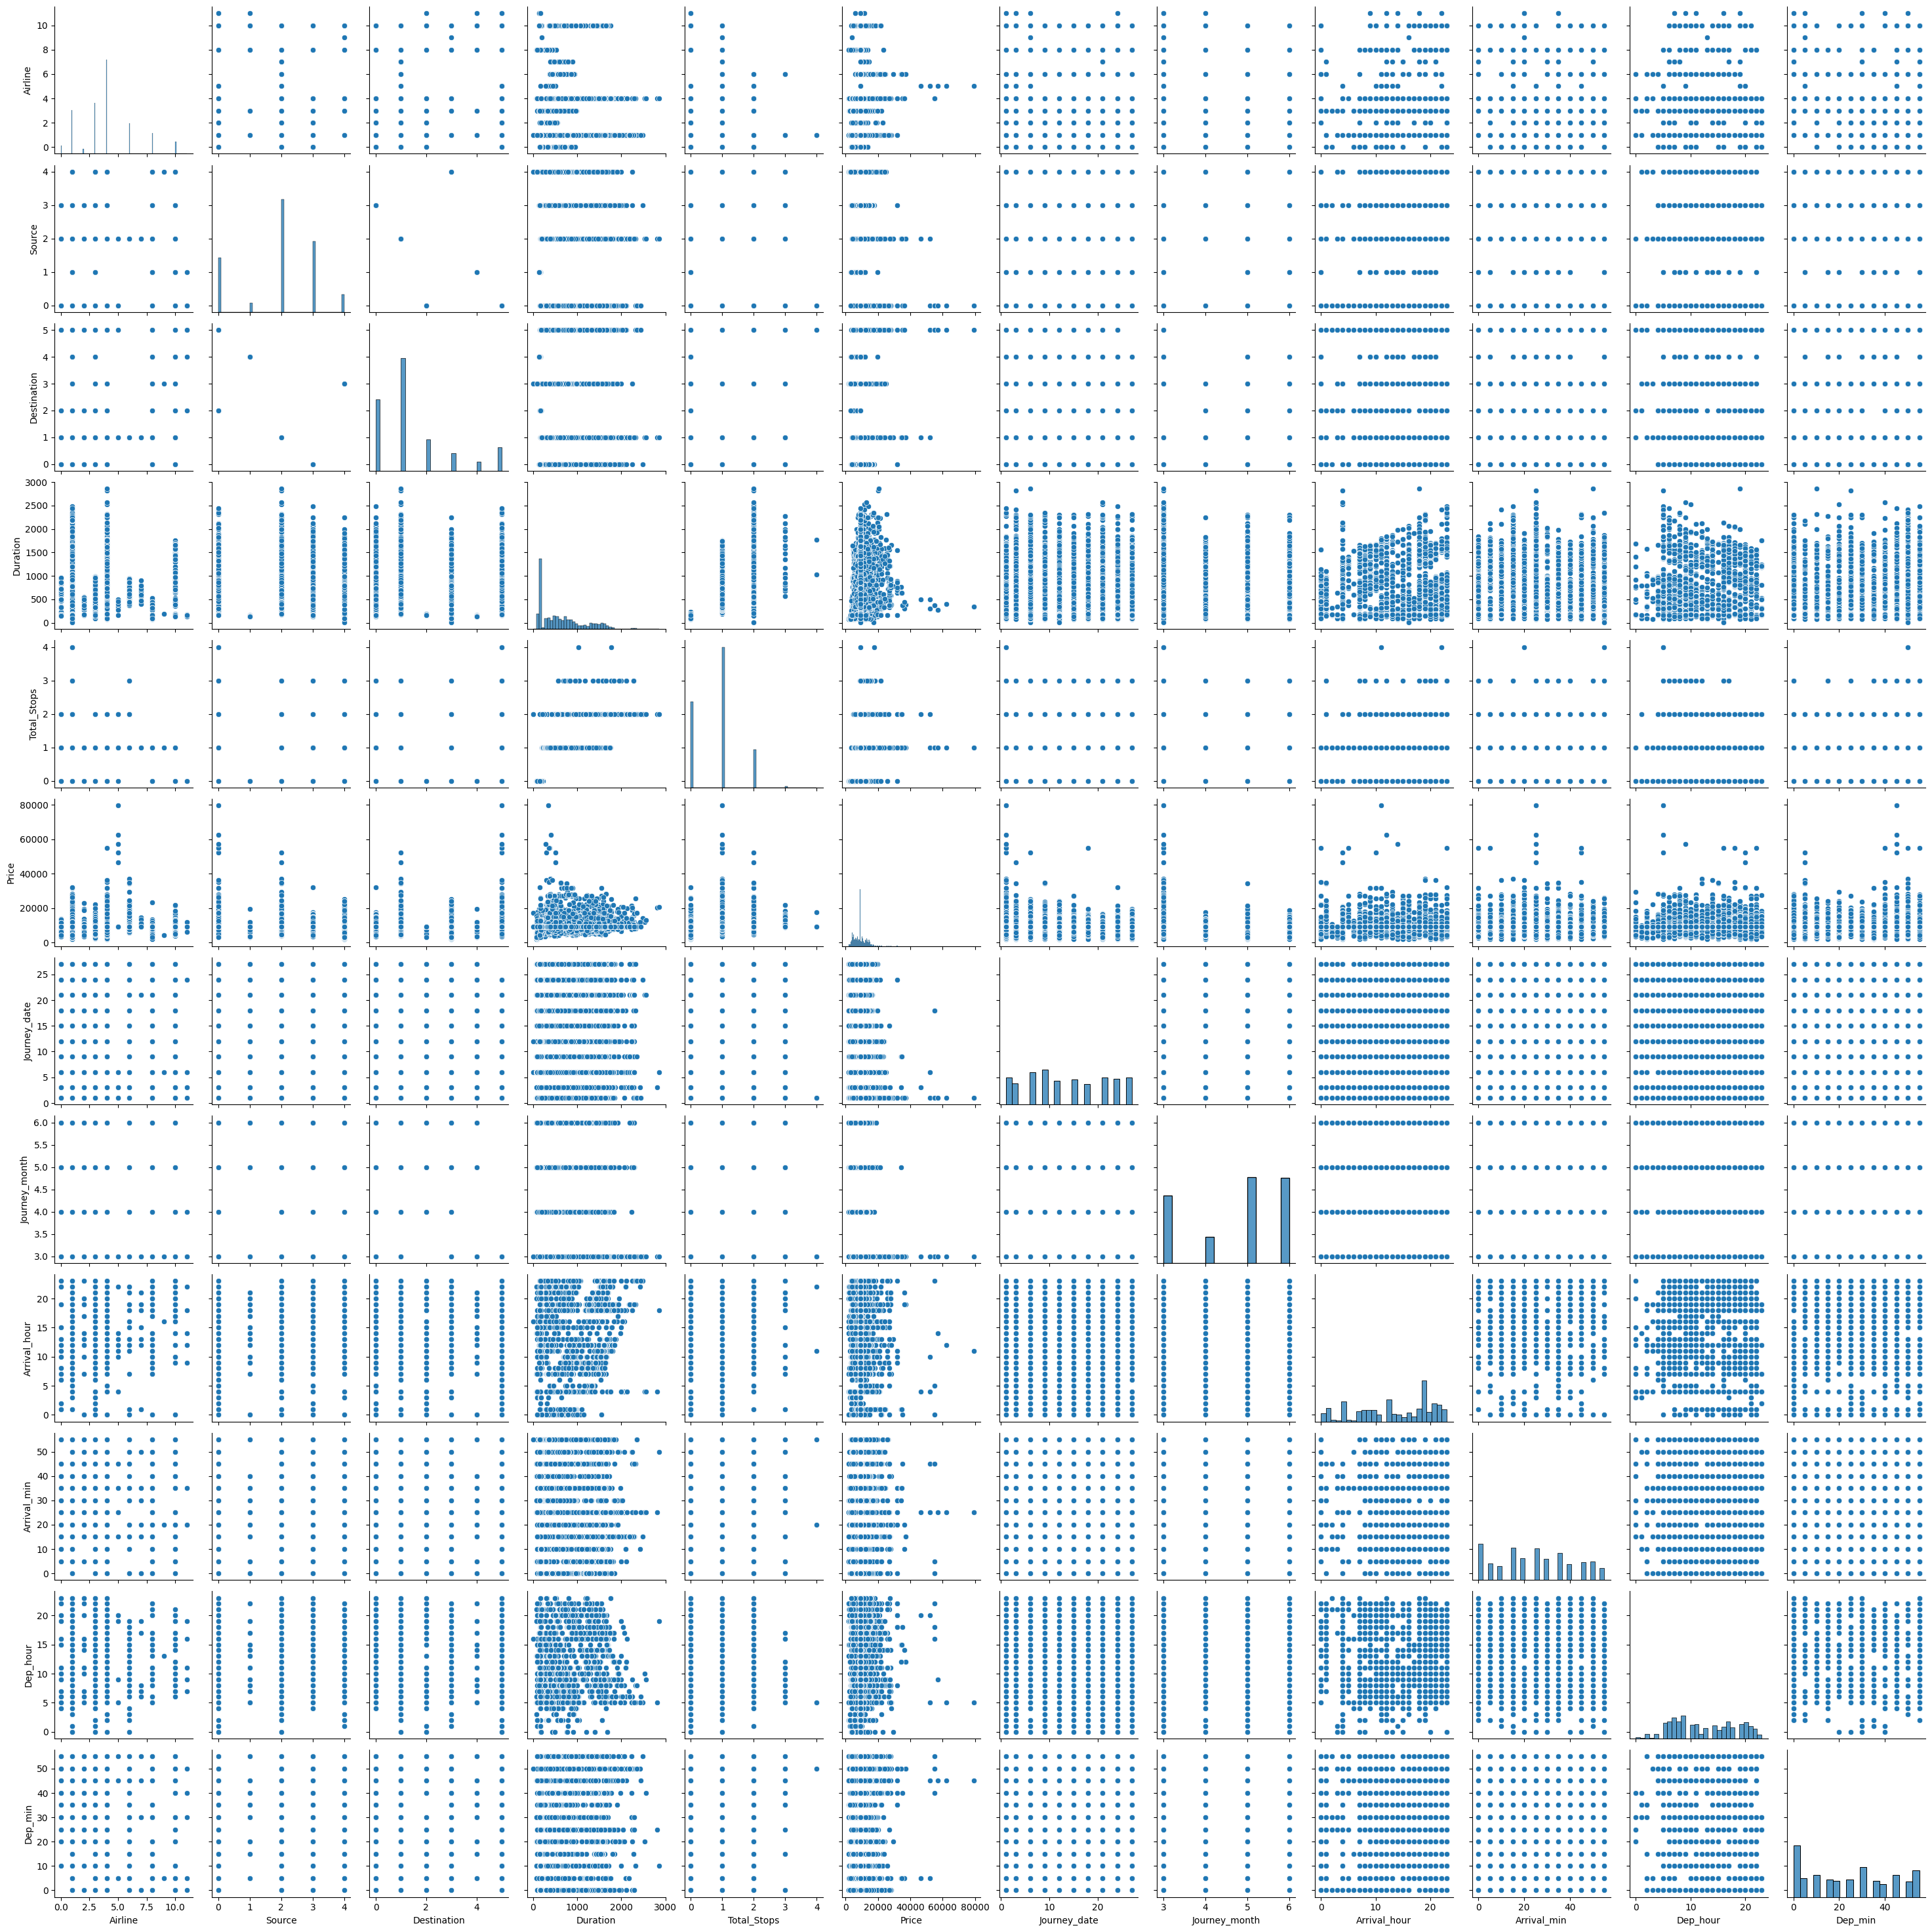

In [72]:
sns.pairplot(flight_df)
plt.show()

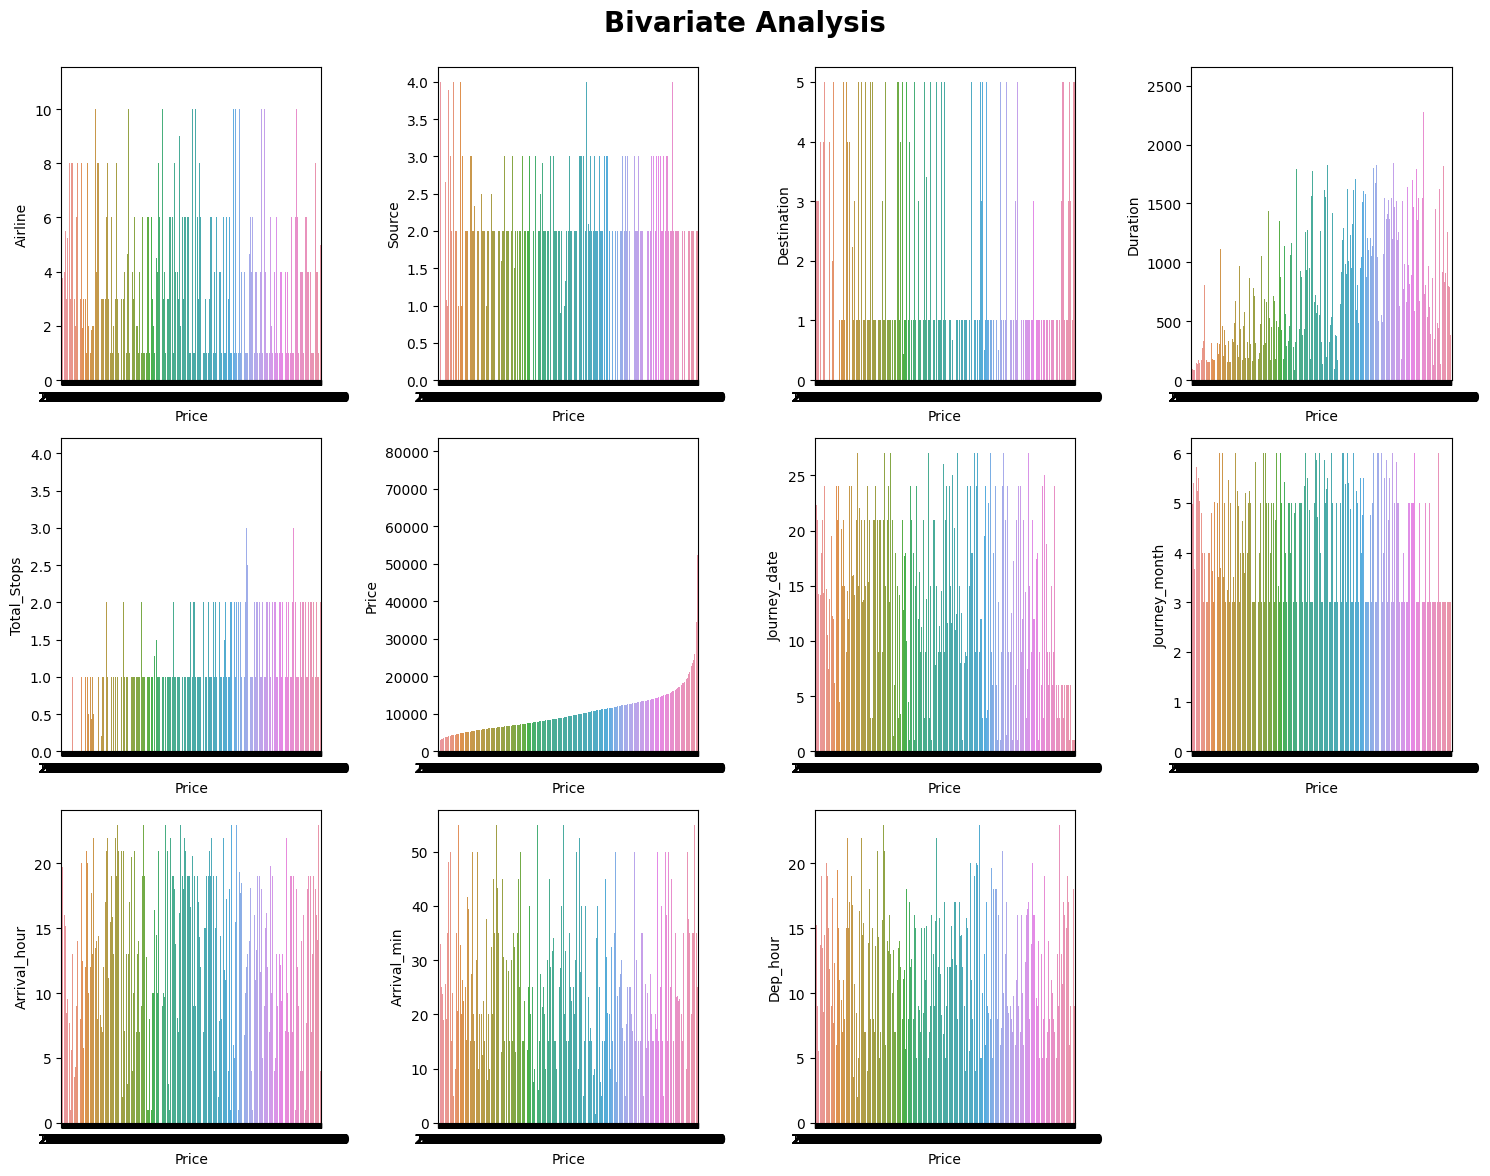

In [51]:
plt.figure(figsize=(15,15))
plt.suptitle("Bivariate Analysis",fontsize=20,fontweight='bold',y=1)

for i in range(0,len(flight_df.columns)-1):
    plt.subplot(4,4,i+1)
    sns.barplot(y=flight_df.columns[i],x='Price',data=flight_df,ci=0)
    plt.tight_layout()

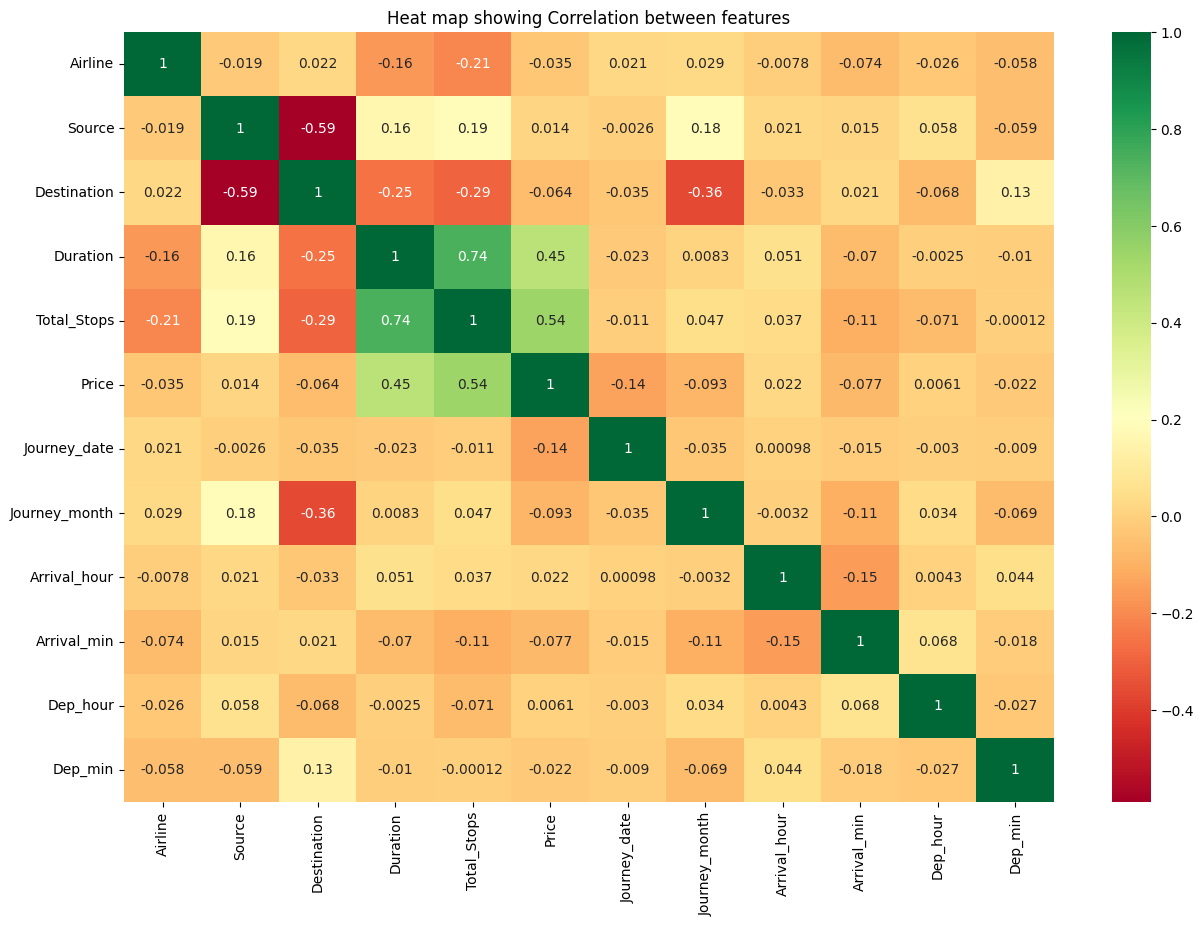

In [52]:
plt.figure(figsize=(15,10))

sns.heatmap(flight_df.corr(),annot=True,cmap='RdYlGn')
plt.title("Heat map showing Correlation between features")

plt.show()

#### There is a high correlation between:
- Price & Total Stops
- Price & flight duration
- Duration & Total stops

#### Creating a discrete, categorical response feature ('rating') from existing 'Total_Stops' and 'Price' variable.

In [75]:
conditions=[(flight_df['Total_Stops'] <=1),(flight_df['Total_Stops']>=3)]
rating=['preferable','suitable']
flight_df['rating']=np.select(conditions,rating,default='average')

In [76]:
flight_df['rating'].value_counts() 

rating
preferable    11397
average        1899
suitable         58
Name: count, dtype: int64

In [90]:
flight_df['rating'].unique()

array(['preferable', 'average', 'suitable'], dtype=object)

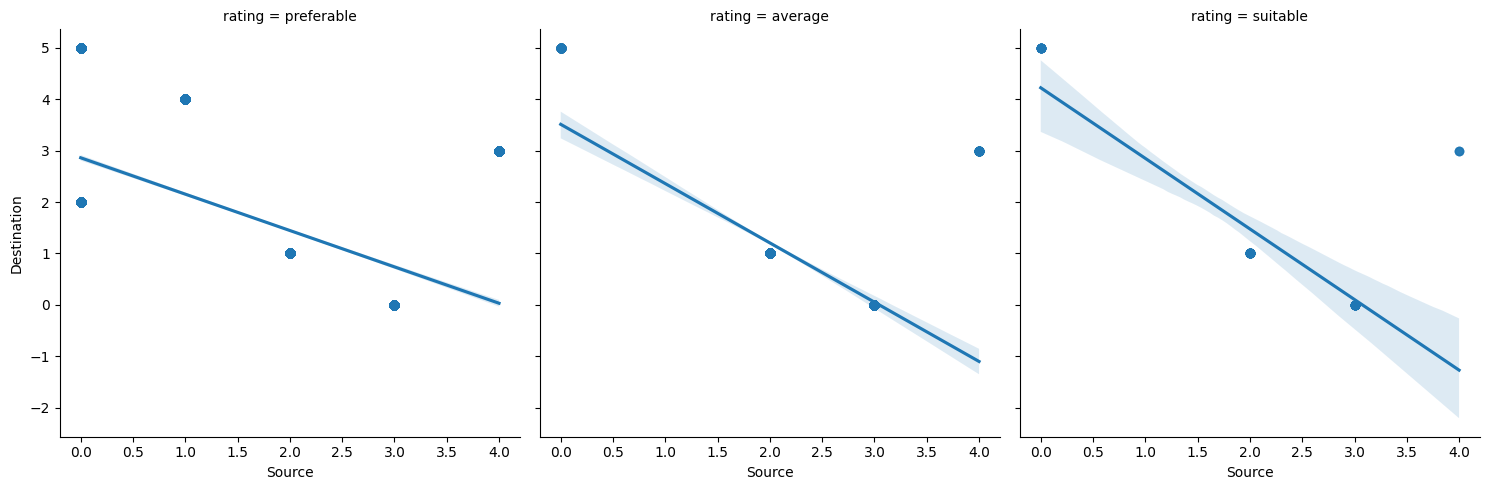

In [77]:
sns.lmplot(x="Source",y="Destination",col="rating",data=flight_df)
plt.show()

In [83]:
conditions=[(flight_df['Price'] <6500),(flight_df['Price']>=10000)]
rating=['preferable','suitable']
flight_df['rating']=np.select(conditions,rating,default='average')

In [84]:
flight_df['rating'].value_counts()

rating
average       5278
suitable      4370
preferable    3706
Name: count, dtype: int64

In [89]:
flight_df['rating'].unique()

array(['preferable', 'average', 'suitable'], dtype=object)

In [85]:
flight_df.groupby('rating').mean()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
rating,,,,,,,,,,,,
average,4.049451,1.922130,1.375710,663.398067,0.852975,8568.714336,13.335165,4.704433,13.893899,23.862258,12.349943,23.863206
preferable,4.076093,1.831085,1.784674,235.786562,0.233135,4617.439288,14.525364,4.712628,12.618187,27.543173,12.497302,25.928225
suitable,3.805721,2.097025,1.211442,961.945538,1.296339,13503.604119,12.492906,4.716247,13.454462,23.191076,12.724027,24.080092


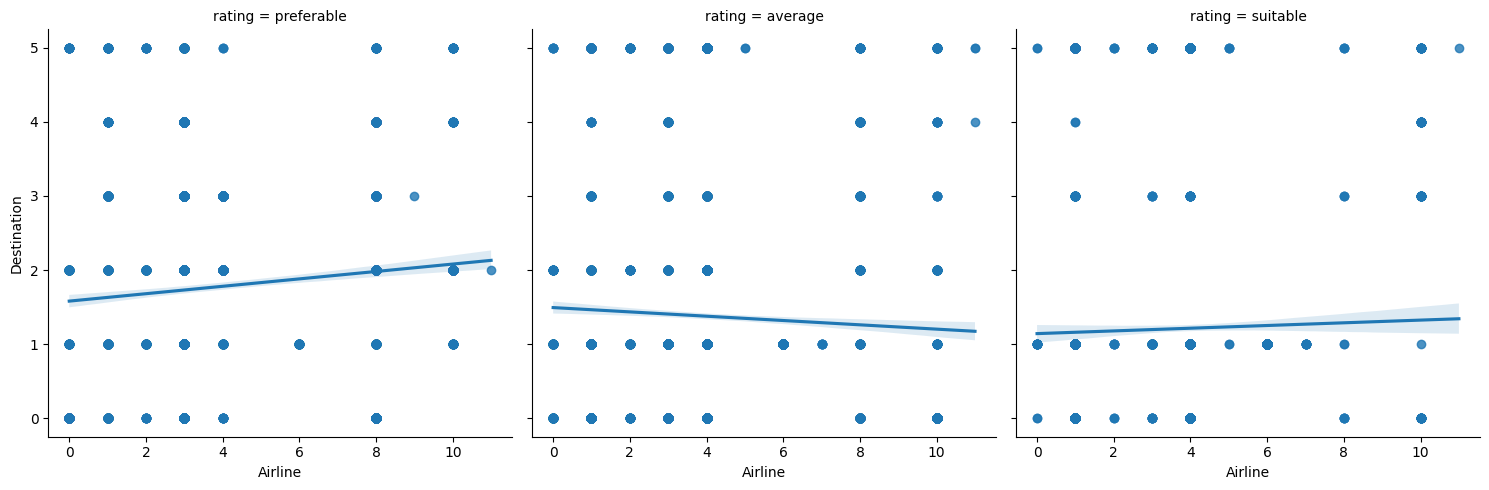

In [86]:
sns.lmplot(x="Airline",y="Destination",col="rating",data=flight_df)
plt.show()

### Building Machine Learning models

For predicting the Price, I build 3 models using the following algorithms: 
- K neighnors regressor
- Decision Tree regressor
- Random Forest Regressor

Compare the accuracies got from these 3 models and select the best model.
Apply hyperparameter tuning to increase its efficiency.
        

In [53]:
#splitting data into train and test dataframe 
train_df=flight_df[0:10683]
test_df=flight_df[10683:]

In [54]:
train_df.tail()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
10678,0,3,0,150,0,4107.0,9,4,22,25,19,55
10679,1,3,0,155,0,4145.0,27,4,23,20,20,45
10680,4,0,2,180,0,7229.0,27,4,11,20,8,20
10681,10,0,5,160,0,12648.0,1,3,14,10,11,30
10682,1,2,1,500,2,11753.0,9,5,19,15,10,55


In [55]:
test_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,4,2,1,655,1,9087.064121,6,6,4,25,17,30
1,3,3,0,240,1,9087.064121,12,5,10,20,6,20
2,4,2,1,1425,1,9087.064121,21,5,19,0,19,15
3,6,2,1,780,1,9087.064121,21,5,21,0,8,0
4,0,0,2,170,0,9087.064121,24,6,2,45,23,55


In [56]:
#splitting data into x and y
x=train_df.drop(["Price"],axis=1)
y=train_df.loc[:,["Price"]].values

In [57]:
# spiliting the dataset into train data and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [58]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8012, 11)
(2671, 11)
(8012, 1)
(2671, 1)


# Import models

In [108]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [109]:
#function to train the models
def predict(algorithm):
    print("Algorithm:",algorithm)
    model=algorithm.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print("The Predicted Price values are:",y_pred)
    print('\n')
    r2=r2_score(y_test,y_pred)
    print("r2 score :",r2)
    #updating score in df  
    #score=score.append({'Model':algorithm,'Accuracy':r2})
    print('MAE:',(mean_absolute_error(y_test,y_pred)))
    print('MSE:',(mean_squared_error(y_test,y_pred)))
    return(r2)

In [110]:
knn=predict(KNeighborsRegressor())

Algorithm: KNeighborsRegressor()
The Predicted Price values are: [[ 8399.4]
 [ 3843.4]
 [10933. ]
 ...
 [14808.8]
 [ 6443.2]
 [ 6902.4]]


r2 score : 0.5878415036033772
MAE: 1769.0793710220892
MSE: 8587336.488041932


In [111]:
dt=predict(DecisionTreeRegressor())

Algorithm: DecisionTreeRegressor()
The Predicted Price values are: [ 7048.  3857. 10991. ... 14441.  7229.  5842.]


r2 score : 0.6358267472446445
MAE: 1434.4462872831648
MSE: 7587562.281733434


In [112]:
rf=predict(RandomForestRegressor())

Algorithm: RandomForestRegressor()
The Predicted Price values are: [ 6792.41        3831.56733333 11419.11       ... 14293.08633333
  6859.60833333  6128.49      ]


r2 score : 0.8070495643573791
MAE: 1186.0307446061674
MSE: 4020128.9816017523


In [113]:
#storing the accuracies of these 3 models in a dataframe
score_df=pd.DataFrame({'Model': ['K-Nearest Neighbour',
                                 'Decision Tree','Random Forest'], 
                       'Accuracy': [ knn*100,dt*100, rf*100]})
score_df

,Model,Accuracy
0,K-Nearest Neighbour,58.784150
1,Decision Tree,63.582675
2,Random Forest,80.704956


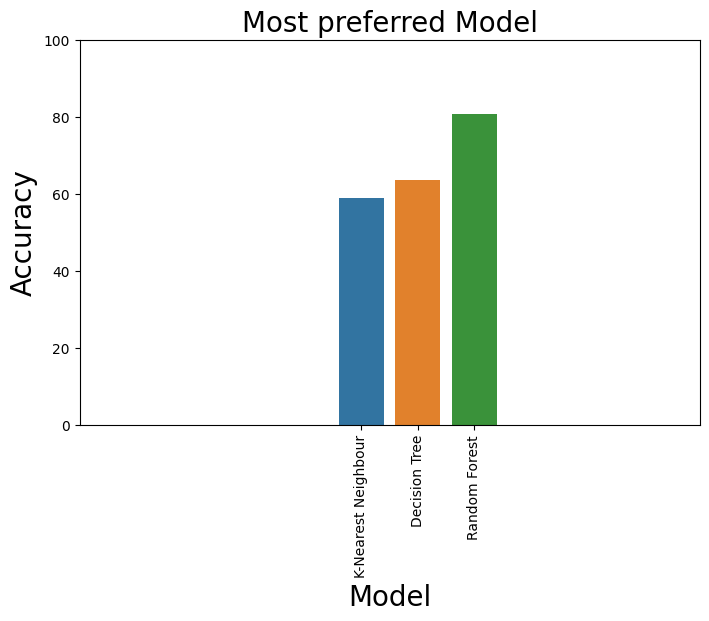

In [114]:
plt.figure(figsize=(8,5))
sns.barplot(data=score_df,x='Model',y='Accuracy')
plt.title("Most preferred Model",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.xlabel("Model",fontsize=20)
plt.xticks(rotation= 90)
plt.ylim(0,100)
plt.xlim(-5,6)
plt.show()

The **Random Forest Regressor model** turned out to be the most accurate one out of the 3 models.

Let's try to improve the accuracy by doing Hyperparameter tuning.

### Hyperparameter tuning

#### Applying  Random Search to find the best parameters

In [115]:
from sklearn.model_selection import RandomizedSearchCV
random_search = {'n_estimators' : [100, 120, 150, 180, 200,220,250],
                 'max_features':['auto','sqrt'],
                 'max_depth':[5,10,15,20],
                 'min_samples_split' : [2, 5, 10, 15, 100],
                 'min_samples_leaf' : [1, 2, 5, 10]}
rf_regressor=RandomForestRegressor()
rf_model=RandomizedSearchCV(estimator=rf_regressor,param_distributions=random_search,
                            cv=3,n_jobs=-1,verbose=2,random_state=0)
rf_model.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 120, 150, 180,
                                                         200, 220, 250]},
                   random_state=0, verbose=2)

In [116]:
# best parameter
rf_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20}

In [117]:
#predicting the values
pred=rf_model.predict(x_test)
r2_score(y_test,pred)

0.810041775624242

#### After hypertuning, the accuracy increases.

In [118]:
print('r2_score:',r2_score(y_test,pred))
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

r2_score: 0.810041775624242
MAE: 1235.3357657604604
MSE: 3957786.156653326
RMSE: 1989.418547378436


For Random Forest Regressor,
- Before hyper tuning, R2 score = 80 %
- After hyper tuning, R2 score = 82 % 
- The value of MAE drops as well, indicating that we are successful in tunning our model.

# Conclusion

To make predictions in the dataset **Flight Price prediction**, I have used different graphs to make correlations of my dataset, like 'barplot', 'kdeplot', 'scatterplot', 'pairplot' and 'heatmap', also used the following models: 'K-Nearest Neighbour',    'Decision Tree', 'Random Forest'.The **Random Forest Regressor Model** performed better out of all models used, its accuracy came out to be **80%** so I decided to work with this. Then, I have used random forest regressor for training the model and improved its accuracy by doing hyperparameter tuning. As a result, I have trained the **Random Forest Regressor Model**, to forecast fares (Price) of flight tickets, with an R2 score of **82%**. The usage of this analysis will be beneficial for both travelers, who can use it to make informed decisions about their travel, and for airlines, who can use it to forecast competitor's rates and adjust their pricing strategies to maximize revenue while remaining competitive.